# (ford go bike data set )
## by (abdulaziz alomar )



## Investigation Overview


>For the presentation, I'll compare the two sorts of users and their genders, and my main points will be as follows: Although there are more subscribers than customers, customers ride bikes more frequently during the day and over far longer distances than subscribers do.


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df = df.drop(['start_station_id', 'start_station_name','end_station_id', 'end_station_name'], 
             axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 16.8+ MB


In [4]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [5]:
df.member_birth_year.isna().sum()

8265

In [6]:
(df.member_birth_year.isna().sum() / df.member_birth_year.shape[0]) *100

4.506248228033062

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_latitude     0
start_station_longitude    0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['age'] = 2019-df['member_birth_year']

In [10]:
d = df[pd.DatetimeIndex(df.start_time).date != pd.DatetimeIndex(df.end_time).date]
d
df['day'] = df.start_time.dt.day_name()
df.loc[pd.DatetimeIndex(df.start_time).date != pd.DatetimeIndex(df.end_time).date , 'day'] = d.end_time.dt.day_name()

In [11]:
from math import sin, cos, sqrt, atan2, radians

def distance_from_startStation_to_endStation (df ,lat1,lon1,lat2,lon2):
   
    R = 6373.0
    lat1 = df[lat1]
    lat2 = df[lat2]
    lon1 = df[lon1]
    lon2 = df[lon2]
    lon1 , lat1 , lon2,lat2 = map(np.radians , [lon1 , lat1 , lon2,lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return np.float64(round(1000*distance))

In [12]:
## we need this function to determin the age ranges 
def age_bins(x):
    if 10<=x<20:
        return '10 - 20'
    elif 20<=x<30:
        return '20 - 30'
    elif 30<=x<40:
        return '30 - 40'
    elif 40<=x<50:
        return '40 - 50'
    elif 50<=x<=60:
        return '50 - 60'
    else:
        return x
df['member_age_bins'] = df['age'].apply(age_bins)

In [13]:
df['distance'] = distance_from_startStation_to_endStation(df ,'start_station_longitude', 'start_station_latitude','end_station_longitude','end_station_latitude')


In [14]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df['user_type'] = df['user_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null category
member_birth_year          175147 non-null int64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
age                        175147 non-null int64
day                        175147 non-null object
member_age_bins            175147 non-null object
distance                   175147 non-null float64
dtypes: category(1), datetime64[ns](2), float64(5), int64(4), object(4

In [15]:
d = df[df.start_time.dt.date != df.end_time.dt.date]
df['day'] = df.start_time.dt.day_name()
df.loc[df.start_time.dt.date != df.end_time.dt.date, 'day'] = d.end_time.dt.day_name()

In [16]:
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'],
                           categories= day_order,
                           ordered = True)

In [17]:
df.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    779.070390
Male      672.639069
Other     996.515334
Name: duration_sec, dtype: float64

In [18]:
 gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
gender_df.rename(columns={'bike_id':'count'}, inplace=True)
gender_df.head()

,count
member_gender,
Female,40844
Male,130651
Other,3652


In [19]:
 gender_df['percent'] = (gender_df['count'] /gender_df['count'].sum()) *100
gender_df.head()

,count,percent
member_gender,,
Female,40844,23.319840
Male,130651,74.595054
Other,3652,2.085106


## the gender Percentage of the bike clients 


>  75 % of the of all clients of the ford  go bike are males and the 23% are females and 3% are  others genders  


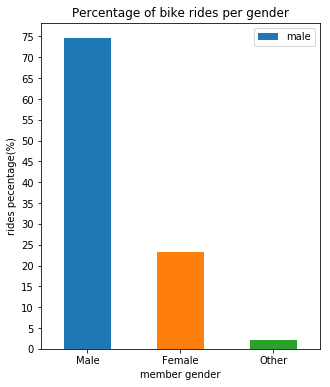

In [20]:
gender_df['percent'].sort_values(ascending=False).plot(kind='bar', figsize=(5,6))
plt.title('Percentage of bike rides per gender',)
plt.xlabel('member gender',)
plt.ylabel('rides pecentage(%)',)
plt.xticks(rotation=360)
plt.yticks([x for x in range(0,80,5)]);
plt.legend(['male','other'] );

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

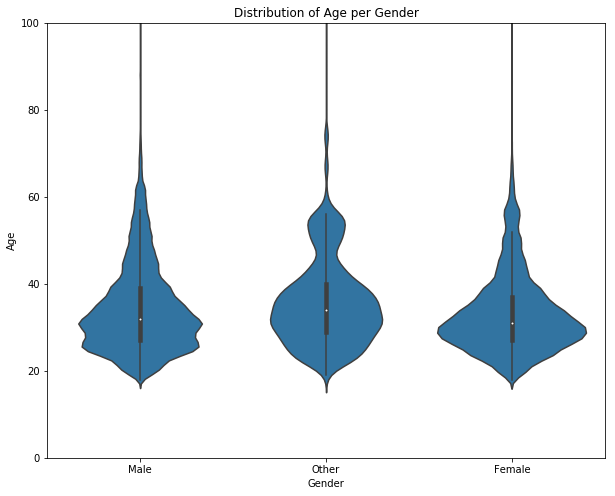

In [21]:
base_color= sb.color_palette()[0]
plt.figure(figsize=[10, 8])
sb.violinplot(data = df, x = 'member_gender', y = 'age', color= base_color)
plt.title("Distribution of Age per Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.ylim([0,100]);

## (the avrage age of the client )

>most of our clients are in there 30s 

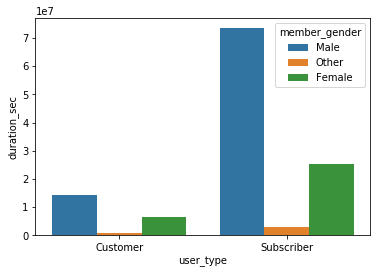

In [22]:
sb.barplot(data=df , x = 'user_type' , y = 'duration_sec' , hue = 'member_gender' , ci= None, estimator= sum  );

##  how put the longest trips 

>as we can see the  longest trips are from the subscribed males 



>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [23]:
#!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 282597 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 